In [1]:
from Utils.Modification import *
from Utils.Model_utils import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv(r'Data\train.csv')
print(df.shape)
df.head()

(115488, 3)


,id,class,segmentation
0,case123_day20_slice_0001,large_bowel,NaN
1,case123_day20_slice_0001,small_bowel,NaN
2,case123_day20_slice_0001,stomach,NaN
3,case123_day20_slice_0002,large_bowel,NaN
4,case123_day20_slice_0002,small_bowel,NaN


In [3]:
df.rename(columns = {'class':'class_name'}, inplace = True)
#--------------------------------------------------------------------------
df["case"] = df["id"].apply(lambda x: int(x.split("_")[0].replace("case", "")))
df["day"] = df["id"].apply(lambda x: int(x.split("_")[1].replace("day", "")))
df["slice"] = df["id"].apply(lambda x: x.split("_")[3])
df.head()

,id,class_name,segmentation,case,day,slice
0,case123_day20_slice_0001,large_bowel,NaN,123,20,0001
1,case123_day20_slice_0001,small_bowel,NaN,123,20,0001
2,case123_day20_slice_0001,stomach,NaN,123,20,0001
3,case123_day20_slice_0002,large_bowel,NaN,123,20,0002
4,case123_day20_slice_0002,small_bowel,NaN,123,20,0002


In [4]:
TRAIN_DIR="Data/train"
# get all the image path with glob
all_train_images = glob(os.path.join(TRAIN_DIR, "**", "*.png"), recursive=True)
x = all_train_images[0].rsplit("/", 4)[0] ## ../input/uw-madison-gi-tract-image-segmentation/train

path_partial_list = []
for i in range(0, df.shape[0]):
    path_partial_list.append(os.path.join(x,
                          "case"+str(df["case"].values[i]),
                          "case"+str(df["case"].values[i])+"_"+ "day"+str(df["day"].values[i]),
                          "scans",
                          "slice_"+str(df["slice"].values[i])))
df["path_partial"] = path_partial_list
df['path_partial'] = df['path_partial'].apply(lambda x: x.replace("Data","Data/train"))
df.head()

,id,class_name,segmentation,case,day,slice,path_partial
0,case123_day20_slice_0001,large_bowel,NaN,123,20,0001,Data/train\case123\case123_day20\scans\slice_0001
1,case123_day20_slice_0001,small_bowel,NaN,123,20,0001,Data/train\case123\case123_day20\scans\slice_0001
2,case123_day20_slice_0001,stomach,NaN,123,20,0001,Data/train\case123\case123_day20\scans\slice_0001
3,case123_day20_slice_0002,large_bowel,NaN,123,20,0002,Data/train\case123\case123_day20\scans\slice_0002
4,case123_day20_slice_0002,small_bowel,NaN,123,20,0002,Data/train\case123\case123_day20\scans\slice_0002


In [5]:
df['path_partial'][0]

'Data/train\\case123\\case123_day20\\scans\\slice_0001'

In [6]:
path_partial_list = []
for i in range(0, len(all_train_images)):
    path_partial_list.append(str(all_train_images[i].rsplit("_",4)[0]))
    
tmp_df = pd.DataFrame()
tmp_df['path_partial'] = path_partial_list
tmp_df['path'] = all_train_images


In [7]:
df = df.merge(tmp_df, on="path_partial").drop(columns=["path_partial"])
# -4 as we don't need the '.png'
df["width"] = df["path"].apply(lambda x: int(x[:-3].rsplit("_",4)[1]))
df["height"] = df["path"].apply(lambda x: int(x[:-3].rsplit("_",4)[2]))
#--------------------------------------------------------------------------
del x,path_partial_list,tmp_df
#--------------------------------------------------------------------------
print(df.shape)
df.head(5)

(115488, 9)


,id,class_name,segmentation,case,day,slice,path,width,height
0,case123_day20_slice_0001,large_bowel,NaN,123,20,0001,Data/train\case123\case123_day20\scans\slice_0...,266,266
1,case123_day20_slice_0001,small_bowel,NaN,123,20,0001,Data/train\case123\case123_day20\scans\slice_0...,266,266
2,case123_day20_slice_0001,stomach,NaN,123,20,0001,Data/train\case123\case123_day20\scans\slice_0...,266,266
3,case123_day20_slice_0002,large_bowel,NaN,123,20,0002,Data/train\case123\case123_day20\scans\slice_0...,266,266
4,case123_day20_slice_0002,small_bowel,NaN,123,20,0002,Data/train\case123\case123_day20\scans\slice_0...,266,266


In [8]:
# RESTRUCTURE  DATAFRAME
df_train = pd.DataFrame({'id':df['id'][::3]})

df_train['large_bowel'] = df['segmentation'][::3].values
df_train['small_bowel'] = df['segmentation'][1::3].values
df_train['stomach'] = df['segmentation'][2::3].values

df_train['path'] = df['path'][::3].values
df_train['case'] = df['case'][::3].values
df_train['day'] = df['day'][::3].values
df_train['slice'] = df['slice'][::3].values
df_train['width'] = df['width'][::3].values
df_train['height'] = df['height'][::3].values


df_train.reset_index(inplace=True,drop=True)
df_train.fillna('',inplace=True); 
# the count columns store the number of mask the exist in image
df_train['count'] = np.sum(df_train.iloc[:,1:4]!='',axis=1).values
print(df_train.shape)
df_train.sample(5)

(38496, 11)


,id,large_bowel,small_bowel,stomach,path,case,day,slice,width,height,count
20039,case33_day0_slice_0056,,,,Data/train\case33\case33_day0\scans\slice_0056...,33,0,0056,266,266,0
7287,case63_day26_slice_0008,,,,Data/train\case63\case63_day26\scans\slice_000...,63,26,0008,266,266,0
34442,case156_day11_slice_0123,20102 13 20352 30 20608 42 20871 46 21135 48 2...,23250 4 23514 7 23779 8 23849 5 24044 10 24113...,,Data/train\case156\case156_day11\scans\slice_0...,156,11,0123,266,266,2
10495,case140_day10_slice_0016,,,,Data/train\case140\case140_day10\scans\slice_0...,140,10,0016,266,266,0
3172,case88_day36_slice_0005,,,,Data/train\case88\case88_day36\scans\slice_000...,88,36,0005,360,310,0


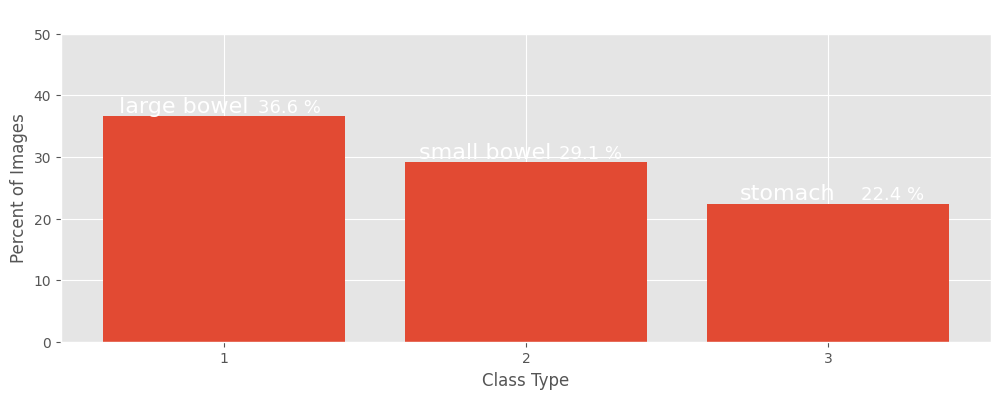

In [9]:
plt.figure(figsize=(12,4))
# specifying "large_bowel","small_bowel","stomach" columns to get the mean of every columns
bar = plt.bar([1,2,3],100*np.mean( df_train.iloc[:,1:4]!='',axis=0))

plt.title('Percent Training Images with Mask', fontsize=16)
plt.ylabel('Percent of Images'); plt.xlabel('Class Type')
plt.xticks([1,2,3])
labels=["large bowel","small bowel","stomach"]

for rect,lbl in zip(bar,labels):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/3, height,  lbl,
             ha='center', va='bottom',fontsize=16)
    plt.text(rect.get_x() + rect.get_width()/1.3, height, '%.1f %%' % height,
             ha='center', va='bottom',fontsize=13)

plt.ylim((0,50)); plt.show()

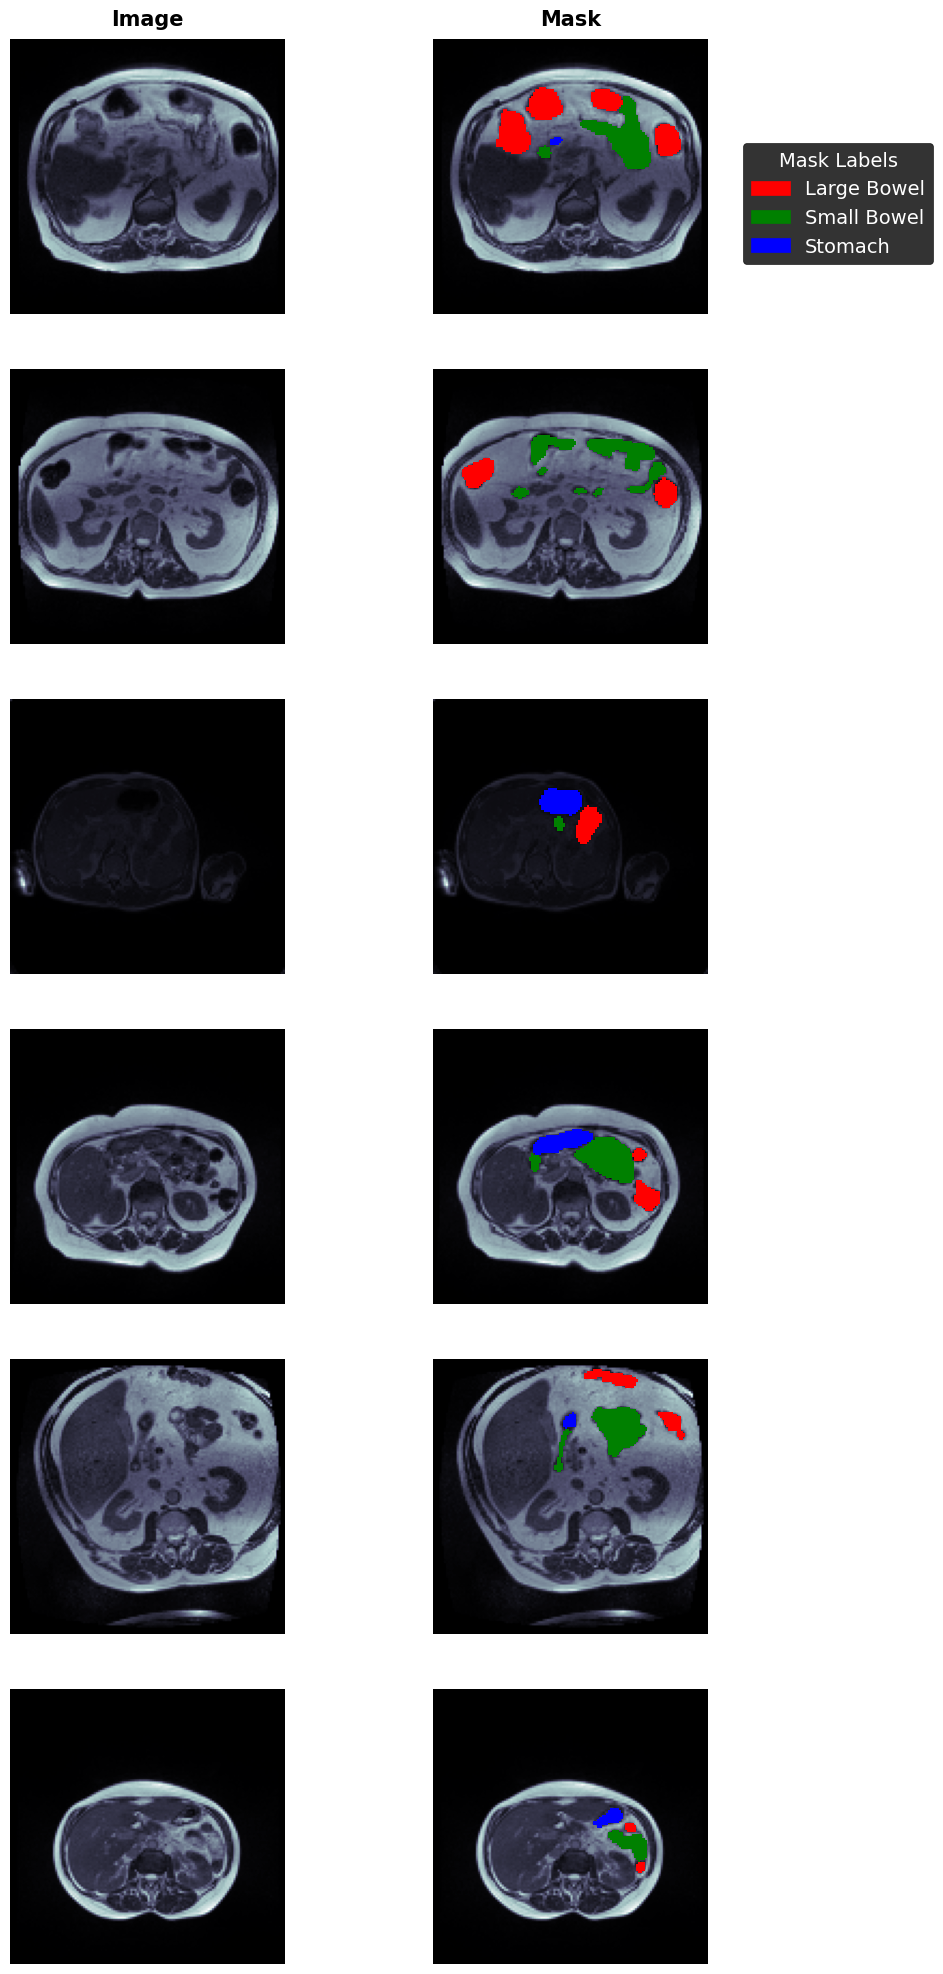

In [10]:
# SAMPLES
# BATCH_SIZE which we are sure that they have mask for large_bowel
Masks = list(df_train[df_train['large_bowel']!=''].sample(BATCH_SIZE).index)
# BATCH_SIZE*2 which we are sure that they have mask for small_bowel
Masks += list(df_train[df_train['small_bowel']!=''].sample(BATCH_SIZE*2).index)
# BATCH_SIZE*3 which we are sure that they have mask for stomach
Masks += list(df_train[df_train['stomach']!=''].sample(BATCH_SIZE*3).index)


# DATA GENERATOR
View_batches = DataGenerator(df_train[df_train.index.isin(Masks)],shuffle=True)

# Visualizing
fig = plt.figure(figsize=(10, 25))
gs = gridspec.GridSpec(nrows=6, ncols=2)
colors = ['red','green','blue']
labels = ["Large Bowel", "Small Bowel", "Stomach"]
patches = [ mpatches.Patch(color=colors[i], label=f"{labels[i]}") for i in range(len(labels))]

cmap1 = mpl.colors.ListedColormap(colors[0])
cmap2 = mpl.colors.ListedColormap(colors[1])
cmap3= mpl.colors.ListedColormap(colors[2])

for i in range(6):
    images, mask = View_batches[i]
    sample_img=images[0,:,:,0]
    mask1=mask[0,:,:,0]
    mask2=mask[0,:,:,1]
    mask3=mask[0,:,:,2]
    
    ax0 = fig.add_subplot(gs[i, 0])
    im = ax0.imshow(sample_img, cmap='bone')

    ax1 = fig.add_subplot(gs[i, 1])
    if i==0:
        ax0.set_title("Image", fontsize=15, weight='bold', y=1.02, color = 'black')
        ax1.set_title("Mask", fontsize=15, weight='bold', y=1.02, color = 'black')
        plt.legend(handles=patches, bbox_to_anchor=(1.1, 0.65), loc=2, borderaxespad=0.4,fontsize = 14,title='Mask Labels', title_fontsize=14, edgecolor="black",  facecolor='black', )

    l0 = ax1.imshow(sample_img, cmap='bone')
    l1 = ax1.imshow(np.ma.masked_where(mask1== False,  mask1),cmap=cmap1, alpha=1)
    l2 = ax1.imshow(np.ma.masked_where(mask2== False,  mask2),cmap=cmap2, alpha=1)
    l3 = ax1.imshow(np.ma.masked_where(mask3== False,  mask3),cmap=cmap3, alpha=1)
    _ = [ax.set_axis_off() for ax in [ax0,ax1]]
    # ax0.set_title("Image", fontsize=15, weight='bold', y=1.02, color= 'black')
    # ax1.set_title("Mask", fontsize=15, weight='bold', y=1.02, color= 'black')
    colors = [im.cmap(im.norm(1)) for im in [l1,l2, l3]]

<AxesSubplot: >

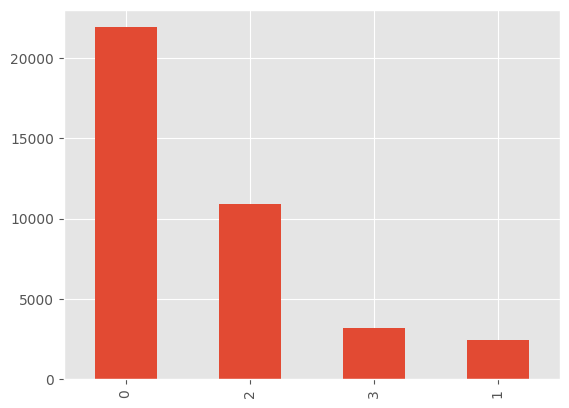

In [11]:
df_train["count"].value_counts().plot.bar()

In [12]:
skf = StratifiedGroupKFold(n_splits=n_splits, shuffle=True, random_state=42)
for fold, (_, val_idx) in enumerate(skf.split(X=df_train, y=df_train['count'],groups =df_train['case']), 1):
    df_train.loc[val_idx, 'fold'] = fold
    
    
df_train['fold'] = df_train['fold'].astype(np.uint8)


test_ids = df_train[df_train["count"] == 0].index
train_ids = df_train[(df_train["fold"]!=fold_selected) & (~df_train.index.isin(test_ids))].index
valid_ids = df_train[(df_train["fold"]==fold_selected) & (~df_train.index.isin(test_ids))].index

df_train.groupby('fold').size()

fold
1    7920
2    6624
3    7952
4    8624
5    7376
dtype: int64

In [13]:
print(valid_ids.shape,test_ids.shape,train_ids.shape)

(2777,) (21906,) (13813,)


<AxesSubplot: xlabel='fold,count'>

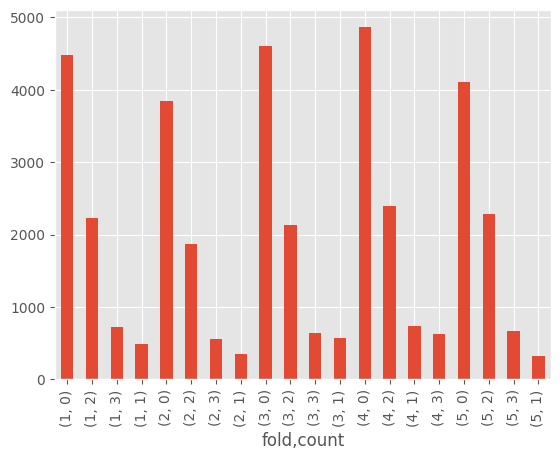

In [14]:
df_train.groupby(['fold'])['count'].value_counts().plot.bar()

<AxesSubplot: >

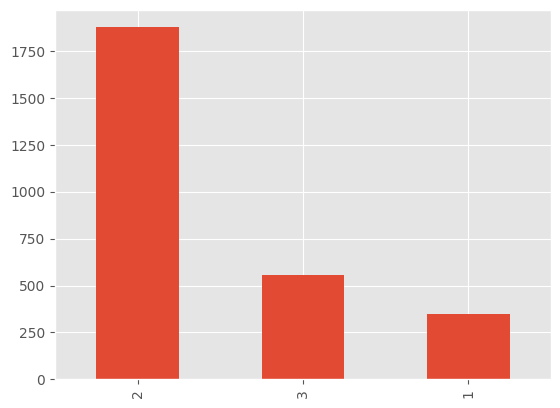

In [15]:
df_train.loc[valid_ids,:]['count'].value_counts().plot.bar()

<AxesSubplot: >

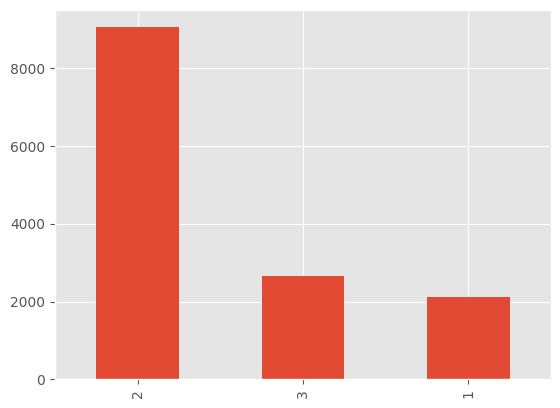

In [16]:
df_train.loc[train_ids,:]['count'].value_counts().plot.bar()

In [17]:
train_generator = DataGenerator(df_train[df_train.index.isin(train_ids)],shuffle=True)
val_generator = DataGenerator(df_train[df_train.index.isin(valid_ids)])
# test_generator = DataGenerator(df_train[df_train.index.isin(test_ids)])
# every mask seperated
train_generator0 = DataGenerator1D(0,df_train[df_train.index.isin(train_ids)],shuffle=True)
val_generator0 = DataGenerator1D(0,df_train[df_train.index.isin(valid_ids)])

train_generator1 = DataGenerator1D(1,df_train[df_train.index.isin(train_ids)],shuffle=True)
val_generator1 = DataGenerator1D(1,df_train[df_train.index.isin(valid_ids)])

train_generator2 = DataGenerator1D(2,df_train[df_train.index.isin(train_ids)],shuffle=True)
val_generator2 = DataGenerator1D(2,df_train[df_train.index.isin(valid_ids)])

In [18]:
from segmentation_models import Unet
from segmentation_models import get_preprocessing
from segmentation_models.losses import bce_jaccard_loss,bce_dice_loss,cce_dice_loss,cce_jaccard_loss ,categorical_focal_dice_loss,categorical_focal_jaccard_loss,jaccard_loss,dice_loss
from segmentation_models.metrics import iou_score,f1_score,f2_score,precision,recall
import segmentation_models as sm
sm.set_framework('tf.keras')
sm.framework()

Segmentation Models: using `keras` framework.


'tf.keras'

In [19]:
model = tf.keras.models.load_model('Models\model0_nocompile.h5', compile = False)

In [20]:
model.compile(optimizer='adam', loss=bce_dice_loss, metrics=[dice_coef,f1_score,f2_score,precision,recall,iou_score])


In [21]:
model.evaluate(val_generator)

173/173 [==============================] - 39s 149ms/step - loss: 0.3917 - dice_coef: 0.7747 - f1-score: 0.6465 - f2-score: 0.6486 - precision: 0.6692 - recall: 0.7721 - iou_score: 0.5337


[0.3916933834552765,
 0.7746918201446533,
 0.6464871168136597,
 0.6486296653747559,
 0.6691587567329407,
 0.7720563411712646,
 0.533650279045105]

In [37]:
start = 8 
end = 12


In [47]:
ids = list(valid_ids)

In [39]:
df_train[df_train.index.isin(valid_ids[20:28])].shape

(8, 12)

In [119]:
start = 21
pred_batches = DataGenerator(df_train[df_train.index.isin(list(valid_ids[start:start+1]))],batch_size = 1,shuffle=True)
images, mask = pred_batches[0]
# mask = mask[0,:,:,0]
mask=mask[0,:,:,:]
frame = pred_batches.__getitem__(0)[0]
frame = tf.image.resize(frame, [128, 128], method='nearest').numpy().reshape(128,128,3)

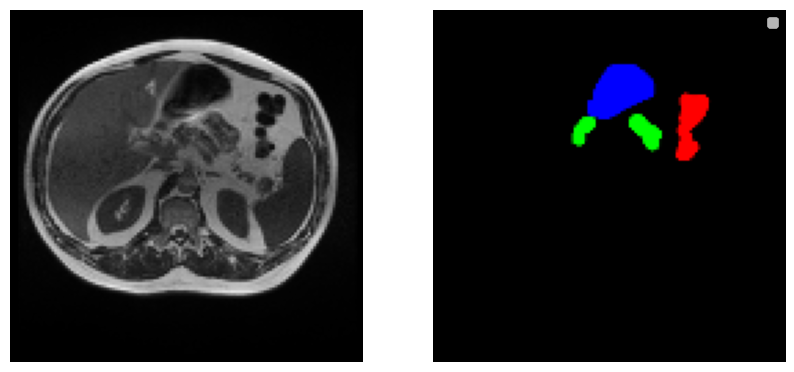

In [130]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(frame, cmap='bone')
#* red mask 

ax[1].imshow(mask1, cmap='bone')
# ax[1].imshow(mask2, cmap='rgb')
# ax[1].imshow(mask3, cmap='rgb')

#all_mask = mask1+mask2+mask3
#ax[1].imshow(all_mask, cmap='bone')

# ax.plot(x, x, ls='dotted', linewidth=2, color='red')
#ax.set_title('Image', color = 'black')
ax[0].grid(False)
ax[1].grid(False)
ax[0].set_axis_off()
ax[1].set_axis_off()
plt.legend(handles = [mask[:,:,0],mask[:,:,1],mask[:,:,1]],labels = ['mask1','mask2','mask3'])
#plt.legend(handles=patches, bbox_to_anchor=(1.1, 0.65), loc=2, borderaxespad=0.4,fontsize = 12,title='Mask Labels', title_fontsize=12, edgecolor="black",  facecolor='#c5c6c7', labelcolor = 'black') 

plt.show()

12/12 [==============================] - 1s 63ms/step


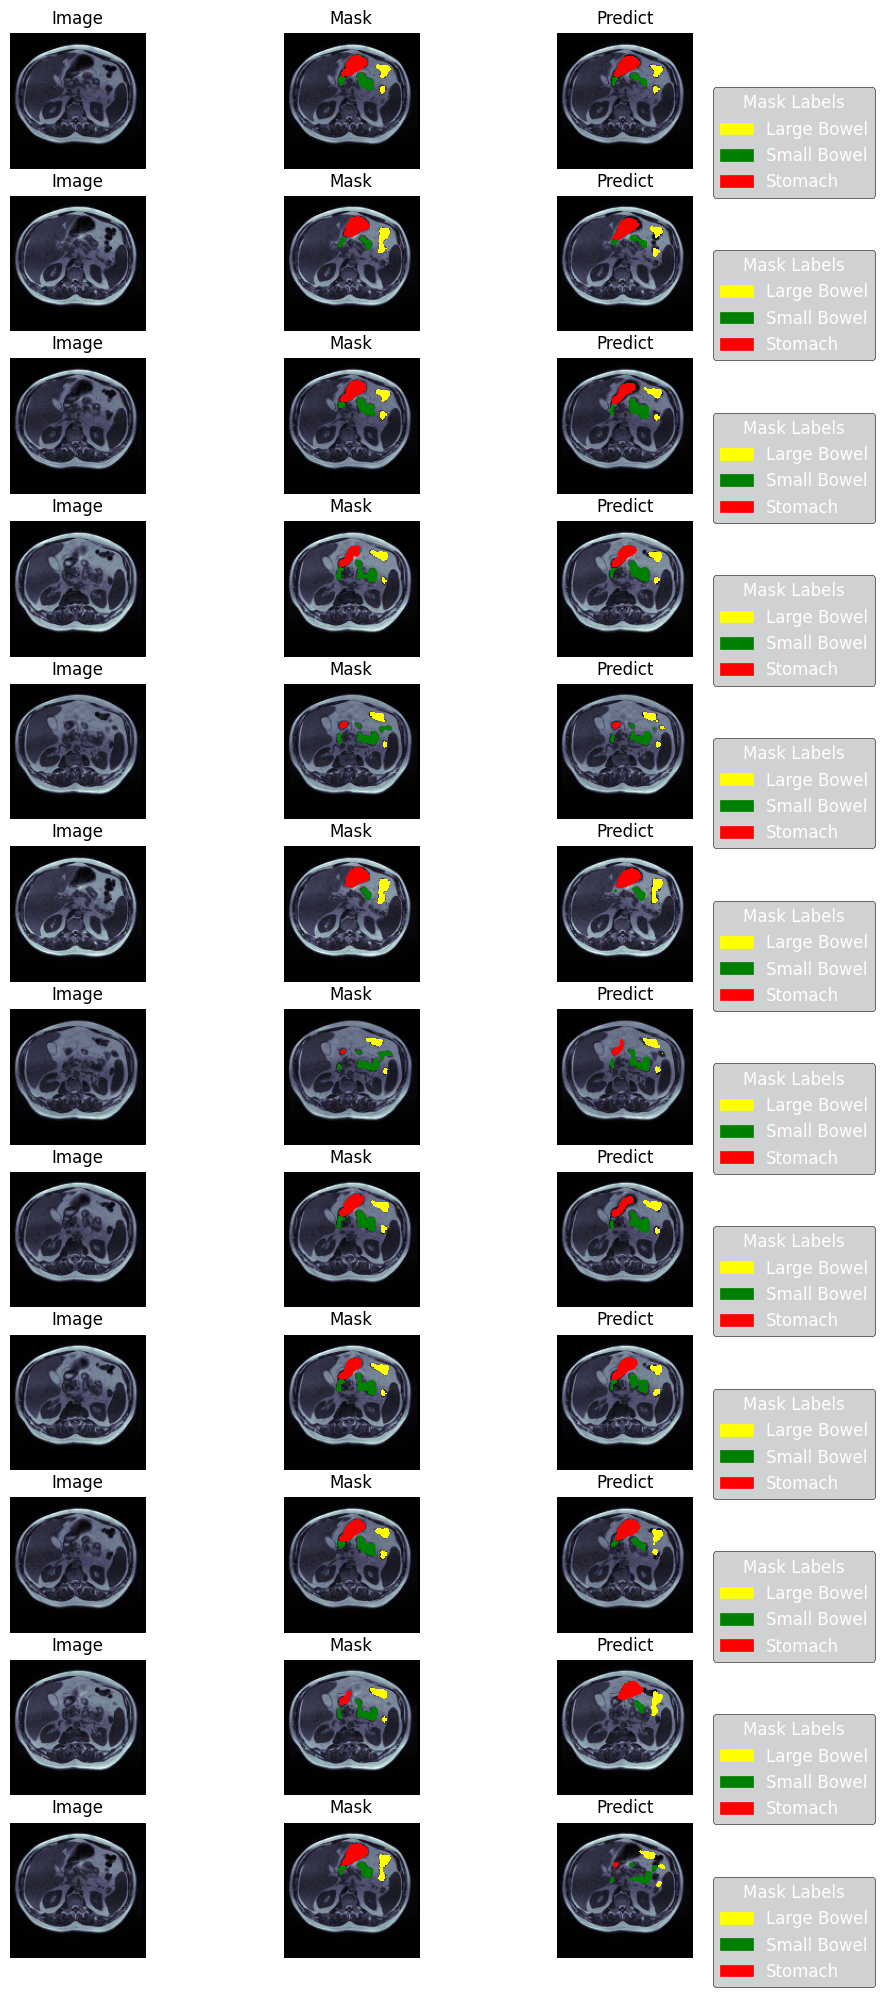

In [118]:
start = 20
end = 32 
pred_batches = DataGenerator(df_train[df_train.index.isin(valid_ids[start:end])],batch_size = 1,shuffle=True)
preds = model.predict_generator(pred_batches,verbose=1)

Threshold = 0.1
# Visualizing
fig = plt.figure(figsize=(10, 25))
gs = gridspec.GridSpec(nrows=end-start, ncols=3)
colors = ['yellow','green','red']
labels = ["Large Bowel", "Small Bowel", "Stomach"]
patches = [ mpatches.Patch(color=colors[i], label=f"{labels[i]}") for i in range(len(labels))]

cmap1 = mpl.colors.ListedColormap(colors[0])
cmap2 = mpl.colors.ListedColormap(colors[1])
cmap3= mpl.colors.ListedColormap(colors[2])

for i in range(end-start):
    images, mask = pred_batches[i]
    sample_img=images[0,:,:,0]
    mask1=mask[0,:,:,0]
    mask2=mask[0,:,:,1]
    mask3=mask[0,:,:,2]
    
    pre=preds[i]
    predict1=pre[:,:,0]
    predict2=pre[:,:,1]
    predict3=pre[:,:,2]
    
    predict1= (predict1 > Threshold).astype(np.float32)
    predict2= (predict2 > Threshold).astype(np.float32)
    predict3= (predict3 > Threshold).astype(np.float32)
    
    ax0 = fig.add_subplot(gs[i, 0])
    im = ax0.imshow(sample_img, cmap='bone')
    ax0.set_title("Image", fontsize=12, y=1.01, color = 'black')
    #--------------------------
    ax1 = fig.add_subplot(gs[i, 1])
    ax1.set_title("Mask", fontsize=12,  y=1.01, color = 'black')
    l0 = ax1.imshow(sample_img, cmap='bone')
    l1 = ax1.imshow(np.ma.masked_where(mask1== False,  mask1),cmap=cmap1, alpha=1)
    l2 = ax1.imshow(np.ma.masked_where(mask2== False,  mask2),cmap=cmap2, alpha=1)
    l3 = ax1.imshow(np.ma.masked_where(mask3== False,  mask3),cmap=cmap3, alpha=1)
    #--------------------------
    ax2 = fig.add_subplot(gs[i, 2])
    ax2.set_title("Predict", fontsize=12, y=1.01, color = 'black')
    l0 = ax2.imshow(sample_img, cmap='bone')
    l1 = ax2.imshow(np.ma.masked_where(predict1== False,  predict1),cmap=cmap1, alpha=1)
    l2 = ax2.imshow(np.ma.masked_where(predict2== False,  predict2),cmap=cmap2, alpha=1)
    l3 = ax2.imshow(np.ma.masked_where(predict3== False,  predict3),cmap=cmap3, alpha=1)
   

    _ = [ax.set_axis_off() for ax in [ax0,ax1,ax2]]
    colors = [im.cmap(im.norm(1)) for im in [l1,l2, l3]]
    plt.legend(handles=patches, bbox_to_anchor=(1.1, 0.65), loc=2, borderaxespad=0.4,fontsize = 12,title='Mask Labels', title_fontsize=12, edgecolor="black",  facecolor='#c5c6c7' )
